### Usage of Thresholding technques upon Anomaly scores.


In [1]:
import random
import matplotlib.pyplot as plt
import thresholding

Starting from a dummy anomaly scores series to show case the usage of different techqnieus.

In [2]:
Anomaly_scores=[random.uniform(0, 0.7) for i in range(100)]
Anomaly_scores[30]=Anomaly_scores[30]+5
Anomaly_scores[31]=Anomaly_scores[31]+5
Anomaly_scores[32]=Anomaly_scores[32]+5

Anomaly_scores[40]=Anomaly_scores[40]+2
Anomaly_scores[41]=Anomaly_scores[41]+2
Anomaly_scores[42]=Anomaly_scores[42]+2

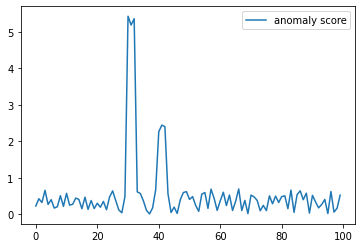

In [3]:
plt.plot(Anomaly_scores, label="anomaly score")
plt.legend()
plt.show()

### Moving 2T

Moving 2T calculates a threshold using the standard deviation and mean of historic anomaly scores (see paper for more details).

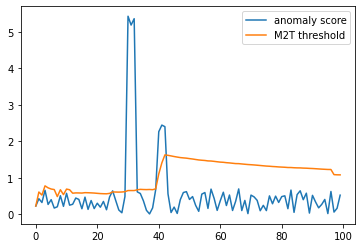

In [4]:
tresholds=[]
anomalies=[]
for i in range(1,len(Anomaly_scores)+1):
    anomalies_so_far=Anomaly_scores[:i]
    is_anomaly,threshold=thresholding.Moving2T(anomalies_so_far,factor=2,hscaleCount=200)
    tresholds.append(threshold)
    anomalies.append(is_anomaly)

plt.plot(Anomaly_scores, label="anomaly score")
plt.plot(tresholds, label="M2T threshold")
plt.legend()
plt.show()

### Moving 2T Exclude

Remove previously found anomalies before applying Moving 2T 

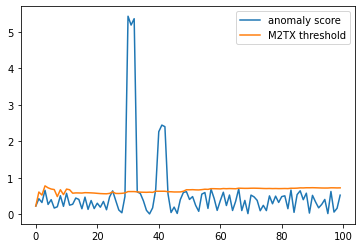

In [5]:
tresholds=[]
anomalies=[]
for i in range(1,len(Anomaly_scores)+1):
    anomalies_so_far=Anomaly_scores[:i]
    is_anomaly,threshold=thresholding.Moving2Texclude(anomalies_so_far,anomalies,factor=2,hscaleCount=200)
    tresholds.append(threshold)
    anomalies.append(is_anomaly)

plt.plot(Anomaly_scores, label="anomaly score")
plt.plot(tresholds, label="M2TX threshold")
plt.legend()
plt.show()

### Dynamic Thresholding

Calculates a new threshold each time based hisotric anomaly scores, where it tries to maximize an objective funtion (see related paper).

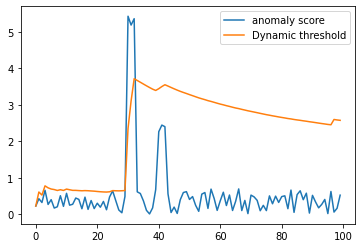

In [6]:
tresholds=[]
anomalies=[]
for i in range(1,len(Anomaly_scores)+1):
    anomalies_so_far=Anomaly_scores[:i]
    is_anomaly,threshold=thresholding.dynamicThresholding(anomalies_so_far,DesentThreshold=0,hscaleCount=200)
    tresholds.append(threshold)
    anomalies.append(is_anomaly)

plt.plot(Anomaly_scores, label="anomaly score")
plt.plot(tresholds, label="Dynamic threshold")
plt.legend()
plt.show()

### Dynamic Thresholding Exclude

Remove previously found anomalies before applying Dynamic Thresholding

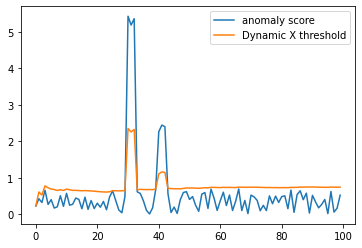

In [7]:
tresholds=[]
anomalies=[]
for i in range(1,len(Anomaly_scores)+1):
    anomalies_so_far=Anomaly_scores[:i]
    is_anomaly,threshold=thresholding.DynamicThresholdingExclude(anomalies_so_far,anomalies=anomalies,DesentThreshold=0,hscaleCount=200)
    tresholds.append(threshold)
    anomalies.append(is_anomaly)

plt.plot(Anomaly_scores, label="anomaly score")
plt.plot(tresholds, label="Dynamic X threshold")
plt.legend()
plt.show()

### Self-Tunning

Calculates threshold based on anomaly scores on possible normal reference

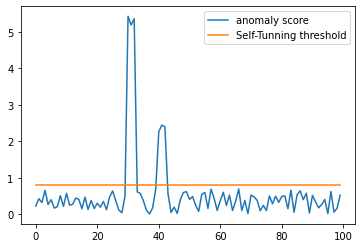

In [8]:
tresholds=[]
anomalies=[]

scores_on_normal_reference = Anomaly_scores[:10]
threshold=thresholding.selfTuning(factor=3,anomaly_scores_in_normal=scores_on_normal_reference)
for sc in Anomaly_scores:
    tresholds.append(threshold)
    anomalies.append(sc>threshold)

plt.plot(Anomaly_scores, label="anomaly score")
plt.plot(tresholds, label="Self-Tunning threshold")
plt.legend()
plt.show()